This notebook best viewed here: https://nbviewer.jupyter.org

In [1]:
from pythonimports import *

# reduce JP baseline SNPs to SNPs with MAF >= 0.05

In [271]:
lview, dview = get_client('default')

56 56


In [272]:
def maf_filter(f):
    """filter MAF >= 0.05, write to file."""
    import pandas
    import os
    chunks = pandas.read_csv(f, sep='\t', chunksize=10000)
    dfs = []
    for chunk in chunks:
#         if len(dfs) % 5 == 0:
#             update([op.basename(f), len(dfs)])
        df = chunk[(chunk['AF'].astype(float) >= 0.05) & (chunk['AF'].astype(float) <= 0.95)].copy()
        df['MAF'] = df['AF']
        df.loc[df['AF'].astype(float) > 0.5, 'MAF'] = 1 - chunk['AF'][chunk['AF'].astype(float) > 0.5]
        dfs.append(df)
    
    df = pandas.concat(dfs)
    print(df.shape)
    
    out = f.replace(".txt", "_maf.txt").replace('02_baseline_filtered', '03_maf-p05')
    makedir(os.path.dirname(out))
    
    df.to_csv(out, sep='\t', index=False)
    print('done!')
dview['maf_filter'] = maf_filter
dview['makedir'] = makedir

In [273]:
# filter the files
DIR = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/snpsANDindels/02_baseline_filtered'
files = [op.join(DIR, f) for f in ['JP_pooled-varscan_all_bedfiles_PARALOGS.txt',
                                   'JP_pooled-varscan_all_bedfiles_SNP.txt',
                                   'JP_pooled-varscan_all_bedfiles_REPEATS.txt']]
for f in files:
    assert op.exists(f)

In [274]:
jobs = make_jobs(files, maf_filter, lview)
watch_async(jobs)

3
3


In [275]:
for j in jobs:
    if j.ready():
        x = j.r

In [276]:
# read in a file to take a look
df = pd.read_csv(files[0].replace(".txt", "_maf.txt").replace('02_baseline_filtered', '03_maf-p05'), sep='\t')
df.head()

,CHROM,POS,REF,ALT,AF,QUAL,TYPE,FILTER,ADP,WT,HET,HOM,NC,JP_p98.GT,JP_p98.GQ,JP_p98.SDP,JP_p98.DP,JP_p98.FREQ,JP_p98.PVAL,JP_p98.AD,JP_p98.RD,JP_p31.GT,JP_p31.GQ,JP_p31.SDP,JP_p31.DP,JP_p31.FREQ,JP_p31.PVAL,JP_p31.AD,JP_p31.RD,JP_p93.GT,JP_p93.GQ,JP_p93.SDP,JP_p93.DP,JP_p93.FREQ,JP_p93.PVAL,JP_p93.AD,JP_p93.RD,JP_p24.GT,JP_p24.GQ,JP_p24.SDP,JP_p24.DP,JP_p24.FREQ,JP_p24.PVAL,JP_p24.AD,JP_p24.RD,JP_p14.GT,JP_p14.GQ,JP_p14.SDP,JP_p14.DP,JP_p14.FREQ,...,JP_p102.DP,JP_p102.FREQ,JP_p102.PVAL,JP_p102.AD,JP_p102.RD,JP_p100.GT,JP_p100.GQ,JP_p100.SDP,JP_p100.DP,JP_p100.FREQ,JP_p100.PVAL,JP_p100.AD,JP_p100.RD,JP_p42.GT,JP_p42.GQ,JP_p42.SDP,JP_p42.DP,JP_p42.FREQ,JP_p42.PVAL,JP_p42.AD,JP_p42.RD,JP_p103.GT,JP_p103.GQ,JP_p103.SDP,JP_p103.DP,JP_p103.FREQ,JP_p103.PVAL,JP_p103.AD,JP_p103.RD,JP_p48.GT,JP_p48.GQ,JP_p48.SDP,JP_p48.DP,JP_p48.FREQ,JP_p48.PVAL,JP_p48.AD,JP_p48.RD,JP_p79.GT,JP_p79.GQ,JP_p79.SDP,JP_p79.DP,JP_p79.FREQ,JP_p79.PVAL,JP_p79.AD,JP_p79.RD,locus,unstitched_chrom,unstitched_pos,unstitched_locus,MAF
0,Scaffold_2,574289,G,A,0.382476,-10.0,SNP,PASS,52,0,40,0,0,G/A,73.0,42,42.0,47.62%,4.785700e-08,20.0,22.0,G/A,59.0,45,45.0,37.78%,0.000001,17.0,28.0,G/A,66.0,50,50.0,38%,2.297500e-07,19.0,31.0,G/A,97.0,61,61.0,44.26%,1.798500e-10,27.0,34.0,G/A,48.0,40,40.0,35%,...,36.0,52.78%,7.301200e-08,19.0,17.0,G/A,87.0,52,52.0,46.15%,1.838400e-09,24.0,28.0,G/A,57.0,56,56.0,30.36%,0.000002,17.0,39.0,G/A,63.0,46,46.0,39.13%,4.799700e-07,18.0,28.0,G/A,95.0,54,54.0,48.15%,2.717100e-10,26.0,28.0,G/A,46.0,49,49.0,28.57%,0.000021,14.0,35.0,Scaffold_2-574289,>super27,574289,>super27-574289,0.382476
1,Scaffold_2,574293,C,T,0.390678,-10.0,SNP,PASS,51,1,39,0,0,C/T,77.0,42,42.0,50%,1.645100e-08,21.0,21.0,C/T,59.0,44,44.0,38.64%,0.000001,17.0,27.0,C/T,66.0,50,50.0,38%,2.297500e-07,19.0,31.0,C/T,101.0,62,62.0,45.16%,7.018400e-11,28.0,34.0,C/T,48.0,40,40.0,35%,...,36.0,52.78%,7.301200e-08,19.0,17.0,C/T,95.0,54,54.0,48.15%,2.717100e-10,26.0,28.0,C/T,57.0,55,55.0,30.91%,0.000002,17.0,38.0,C/T,63.0,46,46.0,39.13%,4.799700e-07,18.0,28.0,C/T,95.0,54,54.0,48.15%,2.717100e-10,26.0,28.0,C/T,50.0,52,52.0,28.85%,0.000009,15.0,36.0,Scaffold_2-574293,>super27,574293,>super27-574293,0.390678
2,Scaffold_2,574357,A,C,0.386459,-10.0,SNP,PASS,39,1,39,0,0,A/C,60.0,30,30.0,53.33%,9.720200e-07,16.0,14.0,A/C,49.0,34,34.0,41.18%,0.000011,14.0,20.0,A/C,40.0,41,41.0,29.27%,9.533900e-05,12.0,29.0,A/C,60.0,39,39.0,43.59%,8.134200e-07,17.0,22.0,A/C,44.0,39,39.0,33.33%,...,21.0,57.14%,2.658000e-05,12.0,9.0,A/C,68.0,42,42.0,45.24%,1.352500e-07,19.0,23.0,A/C,36.0,38,38.0,28.95%,0.000210,11.0,27.0,A/C,48.0,39,39.0,35.9%,1.473500e-05,14.0,25.0,A/C,76.0,45,45.0,46.67%,2.220600e-08,21.0,24.0,A/C,51.0,43,43.0,34.88%,0.000007,15.0,28.0,Scaffold_2-574357,>super27,574357,>super27-574357,0.386459
3,Scaffold_2,574373,T,C,0.359779,-10.0,SNP,PASS,35,2,38,0,0,T/C,56.0,28,28.0,53.57%,2.303700e-06,15.0,13.0,T/C,42.0,29,29.0,41.38%,0.000058,12.0,17.0,T/C,33.0,38,38.0,26.32%,4.952500e-04,10.0,28.0,T/C,48.0,37,37.0,37.84%,1.339300e-05,14.0,23.0,T/C,37.0,35,35.0,31.43%,...,20.0,45%,6.142500e-04,9.0,11.0,T/T,22.0,24,24.0,12.5%,1.170200e-01,3.0,21.0,T/C,41.0,35,35.0,34.29%,0.000078,12.0,23.0,T/C,45.0,33,33.0,39.39%,2.802900e-05,13.0,20.0,T/C,74.0,40,40.0,50%,3.899100e-08,20.0,20.0,T/C,33.0,37,37.0,27.03%,0.000485,10.0,27.0,Scaffold_2-574373,>super27,574373,>super27-574373,0.359779
4,Scaffold_2,574376,A,G,0.358520,-10.0,SNP,PASS,34,4,36,0,0,A/G,47.0,26,26.0,50%,1.637900e-05,13.0,13.0,A/G,42.0,28,28.0,42.86%,0.000054,12.0,16.0,A/G,33.0,37,37.0,27.03%,4.848600e-04,10.0,27.0,A/G,48.0,36,36.0,38.89%,1.270400e-05,14.0,22.0,A/G,37.0,36,36.0,30.56%,...,18.0,44.44%,1.446100e-03,8.0,10.0,A/A,22.0,24,24.0,12.5%,1.170200e-01,3.0,21.0,A/G,29.0,32,32.0,28.12%,0.001019,9.0,23.0,A/G,46.0,31,31.0,41.94%,2.482500e-05,13.0,18.0,A/G,73.0,42,42.0,47.62%,4.785700e-08,20.0,22.0,A/G,33.0,37,37.0,27.03%,0.000485,10.0,27.0,Scaffold_2-574376,>super27,574376,>super27-574376,0.358520


In [277]:
# compare AF with MAF
df[['AF','MAF']]

,AF,MAF
0,0.382476,0.382476
1,0.390678,0.390678
2,0.386459,0.386459
3,0.359779,0.359779
4,0.358520,0.358520
...,...,...
35475,0.277767,0.277767
35476,0.179163,0.179163
35477,0.757842,0.242158
35478,0.404585,0.404585


In [278]:
# how many have AF exactly 0.5?
sum(df['AF']==0.5)

0

In [279]:
# make sure all AFs<0.5 also have a MAF < 0.5
for row in nb(df.index):
    if float(df.loc[row, 'AF']) < 0.5:
        assert df.loc[row, 'MAF'] < 0.5


100%|██████████| 35480/35480 [00:00<00:00, 82768.75it/s]

# create fixed SNPs file
a fixed SNP file is a file with biallelic SNPs (filtered as in pipeline) that have MAF=0

In [280]:
DIR = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/snpsANDindels/01_unfiltered'

In [311]:
# get some ipcluster engines
lview, dview = get_client('default')

30 30


In [282]:
# get the unfiltered VariantsToTable files
files = [f for f in fs(DIR) if f.endswith('table.txt')]
len(files)

450

In [283]:
# read one on, need to add in sample names for columns
df = pd.read_csv(files[-1],sep='\t')
df.head()

,CHROM,POS,REF,ALT,AF,QUAL,TYPE,FILTER,ADP,WT,HET,HOM,NC,Sample1.GT,Sample1.GQ,Sample1.SDP,Sample1.DP,Sample1.FREQ,Sample1.PVAL,Sample1.AD,Sample1.RD,Sample10.GT,Sample10.GQ,Sample10.SDP,Sample10.DP,Sample10.FREQ,Sample10.PVAL,Sample10.AD,Sample10.RD,Sample11.GT,Sample11.GQ,Sample11.SDP,Sample11.DP,Sample11.FREQ,Sample11.PVAL,Sample11.AD,Sample11.RD,Sample12.GT,Sample12.GQ,Sample12.SDP,Sample12.DP,Sample12.FREQ,Sample12.PVAL,Sample12.AD,Sample12.RD,Sample13.GT,Sample13.GQ,Sample13.SDP,Sample13.DP,Sample13.FREQ,...,Sample4.AD,Sample4.RD,Sample40.GT,Sample40.GQ,Sample40.SDP,Sample40.DP,Sample40.FREQ,Sample40.PVAL,Sample40.AD,Sample40.RD,Sample5.GT,Sample5.GQ,Sample5.SDP,Sample5.DP,Sample5.FREQ,Sample5.PVAL,Sample5.AD,Sample5.RD,Sample6.GT,Sample6.GQ,Sample6.SDP,Sample6.DP,Sample6.FREQ,Sample6.PVAL,Sample6.AD,Sample6.RD,Sample7.GT,Sample7.GQ,Sample7.SDP,Sample7.DP,Sample7.FREQ,Sample7.PVAL,Sample7.AD,Sample7.RD,Sample8.GT,Sample8.GQ,Sample8.SDP,Sample8.DP,Sample8.FREQ,Sample8.PVAL,Sample8.AD,Sample8.RD,Sample9.GT,Sample9.GQ,Sample9.SDP,Sample9.DP,Sample9.FREQ,Sample9.PVAL,Sample9.AD,Sample9.RD
0,Scaffold_22227,1999981,A,G,NaN,-10.0,SNP,PASS,3,0,2,0,38,./.,NaN,5,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,0,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,7,NaN,NaN,...,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,./.,NaN,7,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN
1,Scaffold_22227,1999995,A,G,NaN,-10.0,SNP,PASS,3,4,1,0,35,./.,NaN,5,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,0,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,A/A,8.0,8,8.0,12.5%,...,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,A/A,8.0,8,8.0,12.5%,0.5,1.0,7.0,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN
2,Scaffold_22227,2000026,G,A,NaN,-10.0,SNP,PASS,4,4,2,0,34,./.,NaN,5,NaN,NaN,NaN,NaN,NaN,./.,NaN,6,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,G/G,7.0,10,10.0,20%,...,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,./.,NaN,7,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN
3,Scaffold_22227,2000031,G,T,NaN,-10.0,SNP,PASS,4,5,1,0,34,./.,NaN,6,NaN,NaN,NaN,NaN,NaN,./.,NaN,6,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,G/G,7.0,10,10.0,20%,...,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,./.,NaN,7,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN
4,Scaffold_22227,2000194,A,G,NaN,-10.0,SNP,PASS,3,0,0,4,36,./.,NaN,6,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN,./.,NaN,6,NaN,NaN,NaN,NaN,NaN,./.,NaN,2,NaN,NaN,NaN,NaN,NaN,G/G,47.0,11,11.0,90.91%,...,16.0,0.0,./.,NaN,1,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN,./.,NaN,3,NaN,NaN,NaN,NaN,NaN,./.,NaN,6,NaN,NaN,NaN,NaN,NaN,./.,NaN,0,NaN,NaN,NaN,NaN,NaN


In [312]:
# modified from filter_VariantsToTable.py to only pull out fixed SNPs
# modifications are marked with ########## (other than imports)
def pklload(path):
    import pickle
    pkl = pickle.load(open(path, 'rb'))
    return pkl
dview['pklload'] = pklload

def get_varscan_names(df, tablefile):                                          ############ added tablefile arg
    """Convert generic sample/pool names from varscan to something meaningful."""
    print('renaming varscan columns ...')
    import os 
    pool = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(tablefile))))          ############ added
    parentdir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(tablefile))))      ############
    
    # get order of samps used to create varscan cmds (same order as datatable)
    samps = pklload(os.path.join(parentdir, 'poolsamps.pkl'))[pool]                 ############ 
    # create a list of names that varscan gives by default
    generic = ['Sample%s' % (i+1) for i in range(len(samps))]
    # create a map between generic and true samp names
    dic = dict((gen, samp) for (gen, samp) in zip(generic, samps))
    # rename the columns in df
    cols = []
    for col in df:
        if '.' in col:
            gen, rest = col.split(".")
            samp = dic[gen]
            col = '.'.join([samp, rest])
        cols.append(col)
    df.columns = cols
    return df
dview['get_varscan_names'] = get_varscan_names

def load_data(tablefile):
    """
    Load the VariantsToTable output.
    
    Positional arguments:
    tablefile - path to VariantsToTable output - used to find ploidy etc
    
    Returns:
    df - pandas.dataframe; VariantsToTable output
    tf - basename of tablefile
    """
    import os
    import pandas 
    
    tf = os.path.basename(tablefile)

    # load the data, create a column with CHROM-POS for locusID
    df = pandas.read_csv(tablefile, sep='\t')
    print(f'{tf} has {len(df.index)} rows (includes multiallelic)')
    df['locus'] = ["%s-%s" % (contig, pos) for (contig, pos) in zip(df['CHROM'].tolist(), df['POS'].tolist())]
    df = get_varscan_names(df, tablefile)
    return df, tf
dview['load_data'] = load_data

def write_file(tablefile, df, tipe):
    import pandas
    """Write filtered pandas.dataframe to file using args to create file name."""
    newfile = tablefile.replace(".txt", f"_{tipe}.txt")
    df.to_csv(newfile, index=False, sep='\t')
    print('finished filtering VariantsToTable file: %s' % newfile)
dview['write_file'] = write_file

def adjust_freqs(smalldf):
    """
    For loci with REF=N, set freqs of pools with REF=N in GT to numpy.nan.
    Set alt freqs with respect to the second alt allele.
    
    Positional arguments:
    smalldf - pandas.dataframe; df with only REF=N
    
    Returns:
    ndf - smalldf with adjusted freqs in zeroth row
    """
    import pandas
    gtcols = [col for col in smalldf.columns if 'GT' in col]

    for col in gtcols:
        gt = smalldf.loc[1, col]
        if isinstance(gt, str):
            freqcol = col.split(".")[0] + '.FREQ'
            if not gt == 'N/N':
                freq = smalldf.loc[0, freqcol]
                if isinstance(freq, str):
                    if "%" in freq:
                        newfreq = "%s%%" % (100 - float(freq.split("%")[0]))
                        smalldf.loc[0, freqcol] = newfreq
            else:
                # if gt = N/N, adjust to undefined
                smalldf.loc[1, freqcol] = numpy.nan
        gt2 = smalldf.loc[0, col]
        if isinstance(gt2, str):
            if gt == 'N/N':
                # if gt = N/N, adjust to undefined
                smalldf.loc[0, freqcol] = numpy.nan
    return smalldf
dview['adjust_freqs'] = adjust_freqs

def get_refn_snps(df, tipe, ndfs=None):
    """
    Isolate polymorphisms with REF=N but two ALT single nuleodite alleles.
    
    Positional arguments:
    df - pandas.dataframe; current filtered VariantsToTable output
    
    Returns:
    dfs - list of loci (pandas.dataframes) with REF=N and two ALT alleles, counts with respect to second ALT
    ndfs - return from pandas.conat(dfs)
    """
    import pandas
    # as far as I can tell, crisp output from convert_pooled_vcf.py will not output REF = N
    ndf = df[df['REF'] == 'N'].copy()
    ndf = ndf[ndf['TYPE'] == tipe].copy()
    ncount = table(ndf['locus'])
    nloci = [locus for locus in ncount if ncount[locus] == 2]
    ndf = ndf[ndf['locus'].isin(nloci)].copy()
    dfs = []
    for locus in uni(ndf['locus']):
        smalldf = ndf[ndf['locus'] == locus].copy()
        if len(smalldf.index) == 2:
            smalldf.index = range(len(smalldf.index))
            smalldf = adjust_freqs(smalldf)
            smalldf.loc[0,'ALT'] = "%s+%s" % (smalldf.loc[0,'ALT'], smalldf.loc[1,"ALT"])
            dfs.append(pandas.DataFrame(smalldf.loc[0,:]).T)
    if len(dfs) > 0:
        ndfs = pandas.concat(dfs)
    return (dfs, ndfs)
dview['get_refn_snps'] = get_refn_snps

def keep_snps(df, tf):
    """
    Count CHROM-POS (locus) and keep only those with one ALT.
    
    Positional arguments:
    df - pandas.dataframe; currently filtered VariantsToTable output
    tf - basename of path to VariantsToTable output
    Returns:
    df - pandas.dataframe; non-multiallelic-filtered VariantsToTable output
    """
    import pandas
    loccount = table(df['locus'])
    goodloci = [locus for locus in loccount if loccount[locus] == 1]
    print(f'{tf} has {len(goodloci)} good loci (non-multiallelic)')

    # filter df for multiallelic (multiple lines), REF != N
    df = df[df['locus'].isin(goodloci)].copy()
    df = df[df['REF'] != 'N'].copy()
    return df
dview['keep_snps'] = keep_snps

def filter_missing_data(df, tf, tipe):
    """
    Remove loci with < 25% missing data.
    Count numpy.nan in .FREQ col to assess % missing data.
    
    Positional arguments:
    df - pandas.dataframe; VariantsToTable output
    tf - str; basename of tablefile
    tipe - str; one of either "SNP" or "INDEL"
    
    Returns:
    df - pandas.dataframe; missing data-filtered VariantsToTable output
    """
    import tqdm
    import pandas
    freqcols = [col for col in df.columns if '.FREQ' in col]
    copy = get_copy(df, freqcols)
    keepers = []
    # else statement for running single pos.path.(megagamtos.path.yte) through:
    thresh = math.floor(0.25 * len(freqcols)) if len(freqcols) > 1 else 1
    for locus in tqdm.tqdm(copy.columns):
        # if there is less than 25% missing data:
        # the only time x != x is when x is nan (fastest way to count it)
        count = sum(1 for x in copy[locus] if x != x)
        if count < thresh:
            keepers.append(locus)
    df = df[df.index.isin(keepers)].copy()
    df.index = range(len(df.index))
    return df
dview['filter_missing_data'] = filter_missing_data

def get_copy(df, cols):
    """
    Transpose dataframe using specific columns (that will be index after transformation).
    Doing so helps speed things up.
    """
    import pandas
    return df[cols].T.copy()
dview['get_copy'] = get_copy

def filter_freq(df, tf, tipe, tablefile):
    """
    Keep fixed loci.
    
    Positional arguments:
    df - pandas.dataframe; VariantsToTable output
    tablefile - path to VariantsToTable output - used to find ploidy etc
    tf - str; basename of tablefile
    tipe - str; one of either "SNP" or "INDEL"
    
    Returns:
    df - pandas.dataframe; freq-filtered VariantsToTable output
    """
    import tqdm
    import pandas
    # believe it or not, it's faster to do qual and freq filtering in two steps vs an 'and' statement
    lowfreq, highfreq = 0, 0
    print(f'filtering for global frequency ({lowfreq}, {highfreq})...')
    df.reset_index(drop=True, inplace=True)
    
    # prep for filtering
    freqcols = [col for col in df.columns if '.FREQ' in col]
    pool = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(tablefile))))     ############ changed
    parentdir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(tablefile)))) ############
    ploidy = pklload(os.path.join(parentdir, 'ploidy.pkl'))[pool]                             ############ 
    
    # carry on with poolseq datas
    filtloci = []
    afs = []
    copy = get_copy(df, freqcols)
    for locus in tqdm.tqdm(copy.columns):
        freqs = dict((samp.replace(".FREQ",""),freq) for (samp,freq)
                     in copy[locus].str.rstrip('%').astype('float').items()
                     if not math.isnan(freq))  # faster than .str.rstrip('%').astype('float').dropna()
        if len(freqs) > 0:  # avoid loci with all freqs masked (avoid ZeroDivisionError)
            # calc globfreq using the samps/ploidy that are present for this locus
            globfreq = sum([ploidy[samp]*(freq/100)
                            for (samp,freq) in freqs.items()]) / sum([ploidy[samp] for samp in freqs])
            if lowfreq == globfreq or globfreq == highfreq:                                   ############ changed
                filtloci.append(locus)
                # since we're going in order of rows in df ...
                # ... we can use afs to replace AF col later since we reduce df to filtloci
                afs.append(globfreq)
                # which is about 40x faster than: df.loc[locus, 'AF'] = globfreq
    print(f'{tf} has {len(filtloci)} {tipe}s that have global MAF = {lowfreq*100}%')
    df = df[df.index.isin(filtloci)].copy()
    df.index = range(len(df.index))
    df['AF'] = afs
    return df
dview['filter_freq'] = filter_freq

def filter_qual(df, tf, tipe, tablefile):
    """
    mask freqs that have GQ < 20.
    
    Positional arguments:
    df - pandas.dataframe; VariantsToTable output
    tf - str; basename of tablefile
    tipe - str; one of either "SNP" or "INDEL"
    
    Returns: pandas.dataframe; quality-filtered VariantsToTable output
    - FREQ and GT are masked (numpy.nan) if GQ < 20
    """
    import tqdm
    import pandas
    gqcols = [col for col in df.columns if '.GQ' in col]
    print(f'masking bad freqs for {len(gqcols)} pools...')
    for col in tqdm.tqdm(gqcols):
        freqcol = col.replace(".GQ", ".FREQ")
#         gtcol = col.replace(".GQ", ".GT")  # pretty sure this is depricated
        # badloci True if qual < 20
#         df.loc[df[col] < 20, [freqcol, gtcol]] = numpy.nan
        df.loc[df[col] < 20, freqcol] = numpy.nan

    print('filtering for missing data ...')
    df = filter_missing_data(df, tf, tipe)
    
    if len(df.index) > 0:
        print(f'{tf} has {len(df.index)} {tipe}s that have GQ >= 20 and < 25% missing data')
        df = filter_freq(df, tf, tipe, tablefile)
        df.index = range(len(df.index))
    else:
        print(f'{tf} did not have any {tipe}s that have GQ >= 20 for >= 75% of pos.path.' +
              '\nnot bothering to filter for freq')
#         df = drop_freq_cols(df)
    return df
dview['filter_qual'] = filter_qual


def main(tablefile, tipe='SNP', parentdir=None, ret=True):   ########## changed default args
    import sys
    import pandas
    import numpy
    import math
    import tqdm
    import os
    from collections import Counter
    import translate_stitched                                 ######### added
    # load the data
    df, tf = load_data(tablefile)
    
    # filter only SNPs
    df = df[df['TYPE'] == 'SNP'].copy()

    # determine loci with REF=N but biallelic otherwise
    if tipe == 'SNP':
        dfs, ndfs = get_refn_snps(df, tipe)

        # determine which loci are multiallelic
        df = keep_snps(df, tf)
    
    if len(df.index) == 0:
        if ret is True:
            return df
        else:
            # save
            write_file(tablefile, df, tipe)

    # add in loci with REF=N but biallelic otherwise
    if tipe == 'SNP' and len(dfs) > 0:
        print(f'{tf} has {len(ndfs.index)} biallelic {tipe}s with REF=N')
        dfs.append(df)
        df = pandas.concat(dfs)
    # filter for quality and missing data
    df.index = range(len(df.index))
    if 'varscan' in tf and tipe == 'SNP':
        # if we allow to continue for INDEL, each line is treated as a locus (not true for INDEL)
        df = filter_qual(df, tf, tipe, tablefile)
        
    # translate regions
    orderfile = '/data/database/Pita_db/Pita2_stitched_v3/pita2_stitch_v3.order'     ############# added
    df = translate_stitched.main(df.copy(), orderfile)                               ############# added
        
    if ret is True:
        print('returning df')
        return df
    else:
        # save
        write_file(tablefile, df, tipe)
dview['main'] = main
dview['uni'] = uni
from pythonimports import table # in case I use 'table' in an iteration
dview['table'] = table

In [303]:
# test out function before parallelizing, make sure AF == 0
from tqdm import tqdm
import sys
import pandas
import numpy
import math
import tqdm
import os
from collections import Counter

df = main(files[-1], 'SNP')
df.head()

JP_pooled_varscan_bedfile_0449_table.txt has 155282 rows (includes multiallelic)
renaming varscan columns ...
JP_pooled_varscan_bedfile_0449_table.txt has 91857 good loci (non-multiallelic)
JP_pooled_varscan_bedfile_0449_table.txt has 26 biallelic SNPs with REF=N



  0%|          | 0/40 [00:00<?, ?it/s]

masking bad freqs for 40 pools...



100%|██████████| 40/40 [00:00<00:00, 59.09it/s]

filtering for missing data ...



100%|██████████| 91277/91277 [00:05<00:00, 17821.66it/s]

JP_pooled_varscan_bedfile_0449_table.txt has 15604 SNPs that have GQ >= 20 and < 25% missing data
filtering for global frequency (0, 0)...



100%|██████████| 15604/15604 [00:07<00:00, 2178.88it/s]

JP_pooled_varscan_bedfile_0449_table.txt has 35 SNPs that have global MAF = 0%
Starting to translate from stitched to unstitched positions



100%|██████████| 35/35 [00:00<00:00, 351.93it/s]

	checking assumptions...
	translating snp positions: stitched -> unstitched
returning df


,CHROM,POS,REF,ALT,AF,QUAL,TYPE,FILTER,ADP,WT,HET,HOM,NC,JP_p98.GT,JP_p98.GQ,JP_p98.SDP,JP_p98.DP,JP_p98.FREQ,JP_p98.PVAL,JP_p98.AD,JP_p98.RD,JP_p31.GT,JP_p31.GQ,JP_p31.SDP,JP_p31.DP,JP_p31.FREQ,JP_p31.PVAL,JP_p31.AD,JP_p31.RD,JP_p93.GT,JP_p93.GQ,JP_p93.SDP,JP_p93.DP,JP_p93.FREQ,JP_p93.PVAL,JP_p93.AD,JP_p93.RD,JP_p24.GT,JP_p24.GQ,JP_p24.SDP,JP_p24.DP,JP_p24.FREQ,JP_p24.PVAL,JP_p24.AD,JP_p24.RD,JP_p14.GT,JP_p14.GQ,JP_p14.SDP,JP_p14.DP,JP_p14.FREQ,...,JP_p102.SDP,JP_p102.DP,JP_p102.FREQ,JP_p102.PVAL,JP_p102.AD,JP_p102.RD,JP_p100.GT,JP_p100.GQ,JP_p100.SDP,JP_p100.DP,JP_p100.FREQ,JP_p100.PVAL,JP_p100.AD,JP_p100.RD,JP_p42.GT,JP_p42.GQ,JP_p42.SDP,JP_p42.DP,JP_p42.FREQ,JP_p42.PVAL,JP_p42.AD,JP_p42.RD,JP_p103.GT,JP_p103.GQ,JP_p103.SDP,JP_p103.DP,JP_p103.FREQ,JP_p103.PVAL,JP_p103.AD,JP_p103.RD,JP_p48.GT,JP_p48.GQ,JP_p48.SDP,JP_p48.DP,JP_p48.FREQ,JP_p48.PVAL,JP_p48.AD,JP_p48.RD,JP_p79.GT,JP_p79.GQ,JP_p79.SDP,JP_p79.DP,JP_p79.FREQ,JP_p79.PVAL,JP_p79.AD,JP_p79.RD,locus,unstitched_chrom,unstitched_pos,unstitched_locus
0,Scaffold_22228,117928,A,T,0.0,-10,SNP,PASS,64,39,1,0,0,A/A,97.0,51,51.0,0%,1.0,0.0,51.0,A/A,36,20,20,0%,1,0,20,A/A,108.0,57,57.0,0%,1.0,0.0,57.0,A/A,122,66,66,0%,1,0,66,A/A,194,103,103,0%,...,31,31.0,0%,1.0,0.0,31.0,A/A,77.0,42,42.0,0%,1.0,0.0,42.0,A/A,119,63,63,0%,1,0,63,A/A,104.0,56,56.0,0%,1.0,0.0,56.0,A/A,107,58,58,0%,1,0,58,A/A,138,73,73,0%,1,0,73,Scaffold_22228-117928,>TRINITY_DN721_c0_g2_i3,760,>TRINITY_DN721_c0_g2_i3-760
1,Scaffold_22228,270175,G,T,0.0,-10,SNP,PASS,100,39,1,0,0,G/G,179.0,95,95.0,0%,1.0,0.0,95.0,G/G,153,81,81,0%,1,0,81,G/G,194.0,104,104.0,0%,1.0,0.0,104.0,G/G,228,121,121,0%,1,0,121,G/G,182,98,98,0%,...,48,48.0,0%,1.0,0.0,48.0,G/G,217.0,115,115.0,0%,1.0,0.0,115.0,G/G,209,111,111,0%,1,0,111,G/G,202.0,107,107.0,0%,1.0,0.0,107.0,G/G,201,108,108,0%,1,0,108,G/G,231,124,124,0%,1,0,124,Scaffold_22228-270175,>TRINITY_DN3278_c0_g1_i7,739,>TRINITY_DN3278_c0_g1_i7-739
2,Scaffold_22228,273553,A,G,0.0,-10,SNP,PASS,46,39,1,0,0,A/A,77.0,42,42.0,0%,1.0,0.0,42.0,A/A,70,37,37,0%,1,0,37,A/A,82.0,43,43.0,0%,1.0,0.0,43.0,A/A,81,44,44,0%,1,0,44,A/A,85,45,45,0%,...,33,33.0,0%,1.0,0.0,33.0,A/A,85.0,45,45.0,0%,1.0,0.0,45.0,A/A,70,38,38,0%,1,0,38,A/A,100.0,54,54.0,0%,1.0,0.0,54.0,A/A,97,51,51,0%,1,0,51,A/A,134,71,71,0%,1,0,71,Scaffold_22228-273553,>TRINITY_DN3278_c0_g1_i7,4117,>TRINITY_DN3278_c0_g1_i7-4117
3,Scaffold_22228,274688,G,T,0.0,-10,SNP,PASS,40,39,1,0,0,G/G,70.0,38,38.0,0%,1.0,0.0,38.0,G/G,48,25,25,0%,1,0,25,G/G,77.0,42,42.0,0%,1.0,0.0,42.0,G/G,74,39,39,0%,1,0,39,G/G,74,39,39,0%,...,21,21.0,0%,1.0,0.0,21.0,G/G,74.0,39,39.0,0%,1.0,0.0,39.0,G/G,74,39,39,0%,1,0,39,G/G,81.0,44,44.0,0%,1.0,0.0,44.0,G/G,59,31,31,0%,1,0,31,G/G,89,47,47,0%,1,0,47,Scaffold_22228-274688,>TRINITY_DN3278_c0_g1_i7,5252,>TRINITY_DN3278_c0_g1_i7-5252
4,Scaffold_22228,328187,C,A,0.0,-10,SNP,PASS,45,38,1,0,1,C/C,107.0,58,58.0,0%,1.0,0.0,58.0,C/C,21,12,12,0%,1,0,12,C/C,179.0,96,96.0,0%,1.0,0.0,96.0,C/C,52,27,27,0%,1,0,27,C/C,25,14,14,0%,...,23,23.0,0%,1.0,0.0,23.0,C/C,82.0,43,43.0,0%,1.0,0.0,43.0,C/C,32,18,18,0%,1,0,18,C/C,89.0,48,48.0,0%,1.0,0.0,48.0,C/C,51,28,28,0%,1,0,28,C/C,52,27,27,0%,1,0,27,Scaffold_22228-328187,>TRINITY_DN3609_c0_g2_i3,2061,>TRINITY_DN3609_c0_g2_i3-2061


In [304]:
# make sure unique AFs are == 0 
uni(df['AF'])

[0.0]

In [313]:
with dview.sync_imports():
    import sys
    import pandas
    import numpy
    import math
    import tqdm
    import os
    from collections import Counter

importing sys on engine(s)
importing pandas on engine(s)
importing numpy on engine(s)
importing math on engine(s)
importing tqdm on engine(s)
importing os on engine(s)
importing Counter from collections on engine(s)


In [306]:
# test with two files to make sure async works
jobs = make_jobs(files[-2:], main, lview)
watch_async(jobs)

2
2


In [307]:
for j in jobs:
    if j.ready():
        print(j.r.shape)

(12, 337)
(35, 337)


In [322]:
# now real thing
jobs = make_jobs(files, main, lview)
watch_async(jobs)

450
450


In [323]:
fixed = pd.concat([j.r for j in jobs])
fixed.shape

(36687, 337)

In [325]:
fixed.head()

,CHROM,POS,REF,ALT,AF,QUAL,TYPE,FILTER,ADP,WT,HET,HOM,NC,JP_p98.GT,JP_p98.GQ,JP_p98.SDP,JP_p98.DP,JP_p98.FREQ,JP_p98.PVAL,JP_p98.AD,JP_p98.RD,JP_p31.GT,JP_p31.GQ,JP_p31.SDP,JP_p31.DP,JP_p31.FREQ,JP_p31.PVAL,JP_p31.AD,JP_p31.RD,JP_p93.GT,JP_p93.GQ,JP_p93.SDP,JP_p93.DP,JP_p93.FREQ,JP_p93.PVAL,JP_p93.AD,JP_p93.RD,JP_p24.GT,JP_p24.GQ,JP_p24.SDP,JP_p24.DP,JP_p24.FREQ,JP_p24.PVAL,JP_p24.AD,JP_p24.RD,JP_p14.GT,JP_p14.GQ,JP_p14.SDP,JP_p14.DP,JP_p14.FREQ,...,JP_p102.SDP,JP_p102.DP,JP_p102.FREQ,JP_p102.PVAL,JP_p102.AD,JP_p102.RD,JP_p100.GT,JP_p100.GQ,JP_p100.SDP,JP_p100.DP,JP_p100.FREQ,JP_p100.PVAL,JP_p100.AD,JP_p100.RD,JP_p42.GT,JP_p42.GQ,JP_p42.SDP,JP_p42.DP,JP_p42.FREQ,JP_p42.PVAL,JP_p42.AD,JP_p42.RD,JP_p103.GT,JP_p103.GQ,JP_p103.SDP,JP_p103.DP,JP_p103.FREQ,JP_p103.PVAL,JP_p103.AD,JP_p103.RD,JP_p48.GT,JP_p48.GQ,JP_p48.SDP,JP_p48.DP,JP_p48.FREQ,JP_p48.PVAL,JP_p48.AD,JP_p48.RD,JP_p79.GT,JP_p79.GQ,JP_p79.SDP,JP_p79.DP,JP_p79.FREQ,JP_p79.PVAL,JP_p79.AD,JP_p79.RD,locus,unstitched_chrom,unstitched_pos,unstitched_locus
0,Scaffold_1,47456,A,T,0.0,-10,SNP,PASS,112,39,1,0,0,A/A,137.0,74,74.0,0%,1.0,0.0,74.0,A/A,253,136,136,0%,1,0,136,A/A,194.0,103,103.0,0%,1.0,0.0,103.0,A/A,314,167,167,0%,1,0,167,A/A,235,126,126,0%,...,42,42.0,0%,1.0,0.0,42.0,A/A,167.0,90,90.0,0%,1.0,0.0,90.0,A/A,201,108,108,0%,1,0,108,A/A,182.0,98,98.0,0%,1.0,0.0,98.0,A/A,235,125,125,0%,1,0,125,A/A,239,128,128,0%,1,0,128,Scaffold_1-47456,>super4,47456.0,>super4-47456
1,Scaffold_1,48715,G,T,0.0,-10,SNP,PASS,55,39,1,0,0,G/G,74.0,40,40.0,0%,1.0,0.0,40.0,G/G,63,33,33,0%,1,0,33,G/G,92.0,50,50.0,0%,1.0,0.0,50.0,G/G,112,59,59,0%,1,0,59,G/G,127,67,67,0%,...,27,27.0,0%,1.0,0.0,27.0,G/G,67.0,35,35.0,0%,1.0,0.0,35.0,G/G,142,75,75,0%,1,0,75,G/G,85.0,46,46.0,0%,1.0,0.0,46.0,G/G,127,67,67,0%,1,0,67,G/G,85,45,45,0%,1,0,45,Scaffold_1-48715,>super4,48715.0,>super4-48715
2,Scaffold_1,49082,C,T,0.0,-10,SNP,PASS,94,39,1,0,0,C/C,119.0,63,63.0,0%,1.0,0.0,63.0,C/C,160,86,86,0%,1,0,86,C/C,119.0,64,64.0,0%,1.0,0.0,64.0,C/C,216,116,116,0%,1,0,116,C/C,183,97,97,0%,...,46,46.0,0%,1.0,0.0,46.0,C/C,141.0,76,76.0,0%,1.0,0.0,76.0,C/C,194,103,103,0%,1,0,103,C/C,149.0,80,80.0,0%,1.0,0.0,80.0,C/C,216,116,116,0%,1,0,116,C/C,179,96,96,0%,1,0,96,Scaffold_1-49082,>super4,49082.0,>super4-49082
3,Scaffold_1,49836,A,C,0.0,-10,SNP,PASS,68,39,1,0,0,A/A,100.0,53,53.0,0%,1.0,0.0,53.0,A/A,70,38,38,0%,1,0,38,A/A,119.0,64,64.0,0%,1.0,0.0,64.0,A/A,152,82,82,0%,1,0,82,A/A,157,83,83,0%,...,29,29.0,0%,1.0,0.0,29.0,A/A,82.0,43,43.0,0%,1.0,0.0,43.0,A/A,126,68,68,0%,1,0,68,A/A,92.0,50,50.0,0%,1.0,0.0,50.0,A/A,149,79,79,0%,1,0,79,A/A,157,83,83,0%,1,0,83,Scaffold_1-49836,>super4,49836.0,>super4-49836
4,Scaffold_1,671836,G,A,0.0,-10,SNP,PASS,18,38,1,0,1,G/G,44.0,23,23.0,0%,1.0,0.0,23.0,G/G,55,29,29,0%,1,0,29,G/G,47.0,26,26.0,0%,1.0,0.0,26.0,G/G,29,15,15,0%,1,0,15,G/G,40,21,21,0%,...,14,14.0,0%,1.0,0.0,14.0,G/G,25.0,14,14.0,0%,1.0,0.0,14.0,G/G,25,13,13,0%,1,0,13,G/G,32.0,18,18.0,0%,1.0,0.0,18.0,G/G,36,20,20,0%,1,0,20,G/G,29,16,16,0%,1,0,16,Scaffold_1-671836,>super4,671836.0,>super4-671836


In [326]:
f = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/snpsANDindels/02_baseline_filtered/JP_pooled-varscan_all_bedfiles_FIXED-SNPS.txt'
fixed.to_csv(f, sep='\t', index=False)

# break apart repeats into paralog-repeats and regular repeats

the pipeline dumped all repeats into a repeats file, which could have included paralog SNPs

In [30]:
JPparalogs = pd.read_csv('/lu213/brandon.lind/projects/pool_seq/pangenome/mega_pangenome/JP_RFmg7/snpsANDindels/02_baseline_filtered/JP_RFmg7-varscan_all_bedfiles_SNP_paralog_snps.txt',
                         sep='\t')
JPparalogs.head()

,CHROM,POS,REF,ALT,AF,QUAL,TYPE,FILTER,ADP,WT,HET,HOM,NC,JP_RFmg7.GT,JP_RFmg7.GQ,JP_RFmg7.SDP,JP_RFmg7.DP,JP_RFmg7.FREQ,JP_RFmg7.PVAL,JP_RFmg7.AD,locus
0,Scaffold_1,672436,A,G,0.6667,-10.0,SNP,PASS,9,0,1,0,0,A/G,23,9,9,66.67%,0.004525,6,Scaffold_1-672436
1,Scaffold_1,672515,G,A,0.6667,-10.0,SNP,PASS,9,0,1,0,0,G/A,23,9,9,66.67%,0.004525,6,Scaffold_1-672515
2,Scaffold_1,672638,C,T,0.6667,-10.0,SNP,PASS,9,0,1,0,0,C/T,23,9,9,66.67%,0.004525,6,Scaffold_1-672638
3,Scaffold_1,729565,C,T,0.7500,-10.0,SNP,PASS,8,0,1,0,0,C/T,24,8,8,75%,0.003497,6,Scaffold_1-729565
4,Scaffold_1,852025,T,C,0.7778,-10.0,SNP,PASS,9,0,1,0,0,T/C,29,9,9,77.78%,0.001131,7,Scaffold_1-852025


In [31]:
allrepeats = pd.read_csv(repeatfile.replace(".txt", "_annotated.txt"), sep='\t')
allrepeats.head()

/data/programs/brandon_anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (338,339) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CHROM,POS,REF,ALT,AF,QUAL,TYPE,FILTER,ADP,WT,HET,HOM,NC,JP_p98.GT,JP_p98.GQ,JP_p98.SDP,JP_p98.DP,JP_p98.FREQ,JP_p98.PVAL,JP_p98.AD,JP_p98.RD,JP_p31.GT,JP_p31.GQ,JP_p31.SDP,JP_p31.DP,JP_p31.FREQ,JP_p31.PVAL,JP_p31.AD,JP_p31.RD,JP_p93.GT,JP_p93.GQ,JP_p93.SDP,JP_p93.DP,JP_p93.FREQ,JP_p93.PVAL,JP_p93.AD,JP_p93.RD,JP_p24.GT,JP_p24.GQ,JP_p24.SDP,JP_p24.DP,JP_p24.FREQ,JP_p24.PVAL,JP_p24.AD,JP_p24.RD,JP_p14.GT,JP_p14.GQ,JP_p14.SDP,JP_p14.DP,JP_p14.FREQ,...,JP_p102.PVAL,JP_p102.AD,JP_p102.RD,JP_p100.GT,JP_p100.GQ,JP_p100.SDP,JP_p100.DP,JP_p100.FREQ,JP_p100.PVAL,JP_p100.AD,JP_p100.RD,JP_p42.GT,JP_p42.GQ,JP_p42.SDP,JP_p42.DP,JP_p42.FREQ,JP_p42.PVAL,JP_p42.AD,JP_p42.RD,JP_p103.GT,JP_p103.GQ,JP_p103.SDP,JP_p103.DP,JP_p103.FREQ,JP_p103.PVAL,JP_p103.AD,JP_p103.RD,JP_p48.GT,JP_p48.GQ,JP_p48.SDP,JP_p48.DP,JP_p48.FREQ,JP_p48.PVAL,JP_p48.AD,JP_p48.RD,JP_p79.GT,JP_p79.GQ,JP_p79.SDP,JP_p79.DP,JP_p79.FREQ,JP_p79.PVAL,JP_p79.AD,JP_p79.RD,locus,unstitched_chrom,unstitched_pos,unstitched_locus,MAF,annotation,gene_ID
0,Scaffold_1,144683,C,A,0.861639,-10.0,SNP,PASS,13,0,10,23,7,A/A,121.0,24,24.0,95.83%,7.752500e-13,23.0,1.0,A/A,46.0,9,9.0,100%,2.056800e-05,9.0,0.0,A/A,68.0,18,18.0,83.33%,1.465500e-07,15.0,3.0,C/A,18.0,8,8.0,62.5%,1.282100e-02,5.0,3.0,A/A,132.0,28,28.0,92.86%,...,0.000699,7.0,1.0,A/A,58.0,11,11.0,100%,1.417600e-06,11.0,0.0,A/A,58.0,11,11.0,100%,1.417600e-06,11.0,0.0,A/A,58.0,13,13.0,92.31%,0.000001,12.0,1.0,C/A,22.0,11,11.0,54.55%,0.006192,6.0,5.0,C/A,26.0,12,12.0,58.33%,2.288300e-03,7.0,5.0,Scaffold_1-144683,>super4,144683,>super4-144683,0.138361,NaN,NaN
1,Scaffold_1,144688,C,A,0.848177,-10.0,SNP,PASS,13,0,10,23,7,A/A,126.0,25,25.0,96%,2.056800e-13,24.0,1.0,A/A,52.0,10,10.0,100%,5.412500e-06,10.0,0.0,A/A,78.0,20,20.0,85%,1.284800e-08,17.0,3.0,C/A,22.0,10,10.0,60%,5.418000e-03,6.0,4.0,A/A,132.0,26,26.0,96.15%,...,0.000699,7.0,1.0,A/A,52.0,10,10.0,100%,5.412500e-06,10.0,0.0,A/A,58.0,11,11.0,100%,1.417600e-06,11.0,0.0,A/A,53.0,12,12.0,91.67%,0.000005,11.0,1.0,C/A,21.0,12,12.0,50%,0.006865,6.0,6.0,C/A,26.0,12,12.0,58.33%,2.288300e-03,7.0,5.0,Scaffold_1-144688,>super4,144688,>super4-144688,0.151823,NaN,NaN
2,Scaffold_1,144966,T,C,0.929989,-10.0,SNP,PASS,12,0,4,27,9,C/C,115.0,25,25.0,92%,2.776700e-12,23.0,2.0,./.,NaN,6,NaN,NaN,NaN,NaN,NaN,C/C,84.0,21,21.0,85.71%,3.760300e-09,18.0,3.0,C/C,81.0,15,15.0,100%,6.446700e-09,15.0,0.0,./.,NaN,7,NaN,NaN,...,NaN,NaN,NaN,C/C,70.0,13,13.0,100%,9.614800e-08,13.0,0.0,C/C,52.0,10,10.0,100%,5.412500e-06,10.0,0.0,T/C,42.0,13,13.0,76.92%,0.000054,10.0,3.0,C/C,58.0,11,11.0,100%,0.000001,11.0,0.0,C/C,64.0,12,12.0,100%,3.698000e-07,12.0,0.0,Scaffold_1-144966,>super4,144966,>super4-144966,0.070011,NaN,NaN
3,Scaffold_1,330243,C,T,0.828767,-10.0,SNP,PASS,10,0,14,18,8,T/T,42.0,10,10.0,90%,5.953800e-05,9.0,1.0,./.,NaN,7,NaN,NaN,NaN,NaN,NaN,./.,NaN,5,NaN,NaN,NaN,NaN,NaN,T/T,52.0,10,10.0,100%,5.412500e-06,10.0,0.0,T/T,53.0,12,12.0,91.67%,...,NaN,NaN,NaN,C/T,24.0,8,8.0,75%,3.496500e-03,6.0,2.0,T/T,60.0,15,15.0,86.67%,8.767500e-07,13.0,2.0,./.,NaN,7,NaN,NaN,NaN,NaN,NaN,T/T,42.0,10,10.0,90%,0.000060,9.0,1.0,T/T,36.0,9,9.0,88.89%,2.056800e-04,8.0,1.0,Scaffold_1-330243,>super4,330243,>super4-330243,0.171233,NaN,NaN
4,Scaffold_1,353057,G,T,0.925597,-10.0,SNP,PASS,14,0,2,31,7,T/T,49.0,13,13.0,84.62%,1.009600e-05,11.0,2.0,T/T,64.0,14,14.0,92.86%,3.739100e-07,13.0,1.0,T/T,105.0,19,19.0,100%,2.829200e-11,19.0,0.0,T/T,103.0,21,21.0,95.24%,4.087300e-11,20.0,1.0,T/T,87.0,20,20.0,90%,...,NaN,NaN,NaN,./.,NaN,5,NaN,NaN,NaN,NaN,NaN,T/T,42.0,10,10.0,90%,5.953800e-05,9.0,1.0,./.,NaN,7,NaN,NaN,NaN,NaN,NaN,T/T,41.0,8,8.0,100%,0.000078,8.0,0.0,T/T,76.0,14,14.0,100%,2.492700e-08,14.0,0.0,Scaffold_1-353057,>super4,353057,>super4-353057,0.074403,NaN,NaN


In [32]:
pararepeats = allrepeats[allrepeats['locus'].isin(JPparalogs['locus'].tolist())]
pararepeats.shape

(26747, 340)

In [33]:
simprepeats = allrepeats[~allrepeats['locus'].isin(JPparalogs['locus'].tolist())]
simprepeats.shape

(1108479, 340)

In [34]:
allrepeats.shape

(1135226, 340)

In [35]:
26747 + 1108479

1135226

In [36]:
repeatfile

'/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/snpsANDindels/03_maf-p05/JP_pooled-varscan_all_bedfiles_REPEATS_maf.txt'

In [37]:
pararepeats.to_csv('/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/snpsANDindels/03_maf-p05/JP_pooled-varscan_all_bedfiles_PARALOG-REPEATS_maf_annotated.txt',
                  sep='\t', index=False)

In [38]:
simprepeats.to_csv(repeatfile.replace(".txt", "_annotated.txt"), sep='\t', index=False)

# Choose SNPs for GEA structure correction in baypass

for SNPs with MAF > 0.05 and for all pops: 20 < DP < 1000, randomly choose one snp per contig (for contigs > 1Kbp), then LD prune so no pairwise r2 > 99.9th percentile of r2

In [2]:
from pythonimports import *

#### get the snps

In [3]:
# load in the snps
mafdir = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/snpsANDindels/03_maf-p05'
snps = pd.read_table(op.join(mafdir ,'JP_pooled-varscan_all_bedfiles_SNP_maf.txt'))
snps.index = snps['unstitched_locus'].tolist()
snps.head()

,CHROM,POS,REF,ALT,AF,QUAL,TYPE,FILTER,ADP,WT,HET,HOM,NC,JP_p98.GT,JP_p98.GQ,JP_p98.SDP,JP_p98.DP,JP_p98.FREQ,JP_p98.PVAL,JP_p98.AD,JP_p98.RD,JP_p31.GT,JP_p31.GQ,JP_p31.SDP,JP_p31.DP,JP_p31.FREQ,JP_p31.PVAL,JP_p31.AD,JP_p31.RD,JP_p93.GT,JP_p93.GQ,JP_p93.SDP,JP_p93.DP,JP_p93.FREQ,JP_p93.PVAL,JP_p93.AD,JP_p93.RD,JP_p24.GT,JP_p24.GQ,JP_p24.SDP,JP_p24.DP,JP_p24.FREQ,JP_p24.PVAL,JP_p24.AD,JP_p24.RD,JP_p14.GT,JP_p14.GQ,JP_p14.SDP,JP_p14.DP,JP_p14.FREQ,...,JP_p102.DP,JP_p102.FREQ,JP_p102.PVAL,JP_p102.AD,JP_p102.RD,JP_p100.GT,JP_p100.GQ,JP_p100.SDP,JP_p100.DP,JP_p100.FREQ,JP_p100.PVAL,JP_p100.AD,JP_p100.RD,JP_p42.GT,JP_p42.GQ,JP_p42.SDP,JP_p42.DP,JP_p42.FREQ,JP_p42.PVAL,JP_p42.AD,JP_p42.RD,JP_p103.GT,JP_p103.GQ,JP_p103.SDP,JP_p103.DP,JP_p103.FREQ,JP_p103.PVAL,JP_p103.AD,JP_p103.RD,JP_p48.GT,JP_p48.GQ,JP_p48.SDP,JP_p48.DP,JP_p48.FREQ,JP_p48.PVAL,JP_p48.AD,JP_p48.RD,JP_p79.GT,JP_p79.GQ,JP_p79.SDP,JP_p79.DP,JP_p79.FREQ,JP_p79.PVAL,JP_p79.AD,JP_p79.RD,locus,unstitched_chrom,unstitched_pos,unstitched_locus,MAF
>super4-15421,Scaffold_1,15421,A,G,0.674211,-10.0,SNP,PASS,22,0,32,8,0,A/G,67.0,22,22.0,72.73%,1.790500e-07,16.0,6.0,G/G,126.0,32,32.0,84.38%,2.378500e-13,27.0,5.0,A/G,87.0,26,26.0,76.92%,1.827300e-09,20.0,6.0,G/G,113.0,28,28.0,85.71%,4.701500e-12,24.0,4.0,A/G,30.0,14,14.0,57.14%,...,15.0,80%,5.260500e-06,12.0,3.0,A/G,21.0,12,12.0,50%,6.865000e-03,6.0,6.0,A/G,97.0,28,28.0,78.57%,1.758300e-10,22.0,6.0,G/G,49.0,13,13.0,84.62%,1.009600e-05,11.0,2.0,A/G,38.0,26,26.0,42.31%,1.279100e-04,11.0,15.0,A/G,47.0,19,19.0,63.16%,1.861100e-05,12.0,7.0,Scaffold_1-15421,>super4,15421,>super4-15421,0.325789
>super4-47333,Scaffold_1,47333,G,A,0.105707,-10.0,SNP,PASS,109,7,33,0,0,G/A,15.0,61,61.0,8.2%,2.870000e-02,5.0,56.0,G/A,34.0,121,121.0,9.09%,3.850000e-04,11.0,110.0,G/A,58.0,85,85.0,21.18%,1.395700e-06,18.0,67.0,G/G,268.0,144,144.0,0%,1.000000e+00,0.0,144.0,G/A,34.0,133,133.0,8.27%,...,44.0,18.18%,2.757300e-03,8.0,36.0,G/A,21.0,77,77.0,9.09%,6.775500e-03,7.0,70.0,G/A,18.0,109,109.0,5.5%,1.456000e-02,6.0,103.0,G/A,44.0,103,103.0,13.59%,3.802900e-05,14.0,89.0,G/G,250.0,134,134.0,0%,1.000000e+00,0.0,134.0,G/A,27.0,105,105.0,8.57%,1.633500e-03,9.0,96.0,Scaffold_1-47333,>super4,47333,>super4-47333,0.105707
>super4-47418,Scaffold_1,47418,T,A,0.217593,-10.0,SNP,PASS,113,2,38,0,0,T/A,45.0,70,70.0,20%,2.968700e-05,14.0,56.0,T/A,83.0,140,140.0,18.57%,4.146600e-09,26.0,114.0,T/A,82.0,97,97.0,25.77%,5.045400e-09,25.0,72.0,T/A,33.0,155,155.0,7.1%,4.063500e-04,11.0,144.0,T/A,94.0,137,137.0,21.17%,...,44.0,15.91%,6.036300e-03,7.0,37.0,T/A,51.0,89,89.0,17.98%,7.216200e-06,16.0,72.0,T/A,71.0,112,112.0,19.64%,7.603100e-08,22.0,90.0,T/A,71.0,102,102.0,21.57%,6.704300e-08,22.0,80.0,T/A,37.0,121,121.0,9.92%,1.833300e-04,12.0,109.0,T/A,67.0,122,122.0,17.21%,1.861000e-07,21.0,101.0,Scaffold_1-47418,>super4,47418,>super4-47418,0.217593
>super4-47461,Scaffold_1,47461,T,G,0.090661,-10.0,SNP,PASS,109,12,28,0,0,T/T,145.0,77,77.0,0%,1.000000e+00,0.0,77.0,T/T,250.0,133,133.0,0%,1.000000e+00,0.0,133.0,T/G,15.0,103,103.0,4.85%,2.973700e-02,5.0,98.0,T/G,235.0,161,161.0,40.99%,2.881900e-24,66.0,95.0,T/G,27.0,120,120.0,7.5%,...,46.0,0%,1.000000e+00,0.0,46.0,T/G,31.0,84,84.0,11.9%,7.350700e-04,10.0,74.0,T/T,162.0,102,102.0,1.96%,2.487700e-01,2.0,100.0,T/T,144.0,91,91.0,2.2%,2.486200e-01,2.0,89.0,T/G,77.0,123,123.0,19.51%,1.720100e-08,24.0,99.0,T/G,77.0,125,125.0,19.2%,1.758400e-08,24.0,101.0,Scaffold_1-47461,>super4,47461,>super4-47461,0.090661
>super4-47513,Scaffold_1,47513,C,G,0.520739,-10.0,SNP,PASS,112,0,40,0,0,C/G,165.0,77,77.0,55.84%,2.805900e-17,43.0,34.0,C/G,255.0,133,133.0,56.39%,9.126200e-30,75.0,58.0,C/G,134.0,97,97.0,39.18%,3.898700e-14,38.0,59.0,C/G,62.0,168,168.0,11.9%,5.230200e-07,20.0,148.0,C/G,179.0,96,96.0,50%,...,46.0,63.04%,2.465900e-12,29.0,17.0,C/G,143.0,83,83.0,46.99%,4.966300e-15,39.0,44.0,C/G,211.0,116,116.0,49.14%,6.616500e-22,57.0,59.0,C/G,192.0,90,90.0,55.56%,5.861500e-20,50.0,40.0,C/G,255.0,139,139.0,69.78%,1.159100e-41,97.0,42.0,C/G,219.0,120,120.0,49.17

#### reduce to: 20 < pop.DP < 1000

In [3]:
lview,dview = get_client()

40 40


In [4]:
def filter_depth(coldata):
    import pandas
    df = pandas.DataFrame(coldata)
    df = df[df[list(df.columns)[0]] > 20].copy()
    df = df[df[list(df.columns)[0]] < 1000].copy()
    return df.index

In [5]:
jobs = []
for col in snps.columns:
    if '.DP' in col:
        jobs.append(lview.apply(filter_depth, snps[col]))
watch_async(jobs)

40
40


In [6]:
depth_filtered = snps.index.tolist()
for j in nb(jobs):
    depth_filtered = list(set(depth_filtered).intersection(j.r))
len(depth_filtered)

100%|██████████| 40/40 [00:26<00:00,  1.53it/s]


620811

In [7]:
print(snps.shape)
snps = snps[snps.index.isin(depth_filtered)]
snps.shape

(1235752, 338)


(620811, 338)

#### reduce those snps on contigs > 100Kbp  (

In [8]:
# get contig lengths
lengths = pd.read_table('/data/database/Pita_db/Pita2_stitched_v3/pita2_stitch_v3.order', header=None)
lens = dict((contig,length) for (contig,length) in zip(lengths[1],lengths[4]) if length>100000)
len(lens.keys())

58062

In [9]:
freqcols = [col for col in snps.columns if '.FREQ' in col]
reduced = snps[snps['unstitched_chrom'].isin(list(lens.keys()))].copy()
reduced = reduced.loc[:, freqcols + ['unstitched_chrom']]
reduced.shape, snps.shape

((414735, 41), (620811, 338))

In [10]:
min(lens.values())

100001

#### reduce to no missing data

In [11]:
def reduce_col(col):
    """Return list of loci with no missing data for pop.FREQ col."""
    return reduced[~reduced[col].isnull()].index

dview['reduced'] = reduced

In [12]:
# send jobs to reduce_col
freqcols = [col for col in reduced.columns if '.FREQ' in col]
jobs = []
for col in freqcols:
    jobs.append(lview.apply_async(reduce_col, col))
watch_async(jobs)

40
40


In [13]:
# combine returns to get loci with no missing data across pop.FREQ cols
nomissingloci = snps.index.tolist()
for j in jobs:
    nomissingloci = list(set(nomissingloci).intersection(j.r))
len(nomissingloci), luni(nomissingloci)

(414735, 414735)

In [14]:
# reduce snp table to no missing loci
reduced = reduced[reduced.index.isin(nomissingloci)]
reduced.head()

,JP_p98.FREQ,JP_p31.FREQ,JP_p93.FREQ,JP_p24.FREQ,JP_p14.FREQ,JP_p70.FREQ,JP_p8.FREQ,JP_p95.FREQ,JP_p57.FREQ,JP_p96.FREQ,JP_p51.FREQ,JP_p73.FREQ,JP_p83.FREQ,JP_p26.FREQ,JP_p68.FREQ,JP_p6.FREQ,JP_p92.FREQ,JP_p72.FREQ,JP_p94.FREQ,JP_p62.FREQ,JP_p99.FREQ,JP_p39.FREQ,JP_p97.FREQ,JP_p90.FREQ,JP_p37.FREQ,JP_p84.FREQ,JP_p27.FREQ,JP_p82.FREQ,JP_p29.FREQ,JP_p20.FREQ,JP_p77.FREQ,JP_p4.FREQ,JP_p101.FREQ,JP_p60.FREQ,JP_p102.FREQ,JP_p100.FREQ,JP_p42.FREQ,JP_p103.FREQ,JP_p48.FREQ,JP_p79.FREQ,unstitched_chrom
>super4-47333,8.2%,9.09%,21.18%,0%,8.27%,13.56%,5.43%,4.71%,3.68%,7.92%,6.25%,5.3%,8.65%,8.65%,18.4%,7.46%,18.7%,3.25%,20%,2.46%,13.33%,3.94%,7.45%,14.89%,2.63%,5.98%,3.4%,2.56%,6.72%,6.34%,25.38%,0%,28.33%,19.81%,18.18%,9.09%,5.5%,13.59%,0%,8.57%,>super4
>super4-47418,20%,18.57%,25.77%,7.1%,21.17%,27.78%,34.34%,10.09%,23.45%,25.53%,37.82%,39.13%,19.59%,18.95%,15%,22.67%,13.39%,33.12%,10.64%,39.67%,14.29%,29.93%,4.04%,11%,27.85%,18.44%,27.27%,15.29%,49.62%,30.77%,32%,15.71%,5.88%,20%,15.91%,17.98%,19.64%,21.57%,9.92%,17.21%,>super4
>super4-47461,0%,0%,4.85%,40.99%,7.5%,16.52%,6.19%,5.5%,7.09%,2.08%,8.97%,15.15%,9.64%,5.06%,10.92%,13.16%,1.65%,19.05%,1.18%,1.72%,3.57%,16.78%,6.98%,3.06%,15.19%,9.93%,11.76%,6.02%,11.19%,6.06%,10.34%,8.47%,0%,6.06%,0%,11.9%,1.96%,2.2%,19.51%,19.2%,>super4
>super4-47513,55.84%,56.39%,39.18%,11.9%,50%,34.78%,52.43%,70.71%,56.62%,63.21%,48.41%,34.07%,45%,68%,41.94%,56.34%,65.12%,36%,55.77%,50%,58.02%,47.1%,63.64%,73.47%,47.62%,53.59%,57.55%,60.24%,32.77%,47.3%,28.46%,64.62%,64.18%,54%,63.04%,46.99%,49.14%,55.56%,69.78%,49.17%,>super4
>super4-47541,0%,0%,0%,0%,11%,16.53%,2.8%,0.93%,7.03%,0%,6.83%,10.49%,8.91%,2.31%,9.38%,9.09%,0%,11.56%,0%,1.67%,5.13%,16.55%,0%,4.04%,3.49%,11.64%,7.81%,5.75%,16.39%,6.72%,7.63%,2.99%,0%,5.26%,0%,1.2%,0%,0%,2.19%,12.82%,>super4


In [15]:
len(nomissingloci), nrow(reduced)

(414735, 414735)

In [16]:
nrow(snps)

620811

#### choose one snp per contig

In [17]:
def choose_random_loci(chrom_list):
    """For each chrom in chrom_list, randomly choose 1 snp."""
    from random import shuffle
    
    loci = []
    for chrom in chrom_list:
        snps = list(reduced[reduced['unstitched_chrom']==chrom].index)
        shuffle(snps)
        loci.append(snps[0])

    return loci
dview['reduced'] = reduced  # reload reduced

In [18]:
# send to choose_random_loci
uni_chroms = uni(reduced['unstitched_chrom'])
chrom_list = []
jobs = []
for i,chrom in enumerate(uni_chroms):
    chrom_list.append(chrom)
    if len(chrom_list) == 550 or (i+1) == len(uni_chroms):
        jobs.append(lview.apply_async(choose_random_loci, chrom_list))
        chrom_list = []
watch_async(jobs)

31
31


In [19]:
randomloci = []
for j in jobs:
    randomloci.extend(j.r)
len(randomloci) == len(uni_chroms)

True

In [20]:
len(randomloci)

16664

In [21]:
pkldump(randomloci, '/data/home/lindb/randomloci.pkl')

In [236]:
reduced = reduced[reduced.index.isin(randomloci)].copy()

#### get an *idea* of r2 values so we can determine an empirical high-end cutoff

In [62]:
def getr2(myloci):
    from scipy.stats import pearsonr

    freqs = dict((locus, freqs) for (locus,freqs) in getfreqs(myloci))

    r2vals = []
    for i,locusi in enumerate(myloci):
        for j,locusj in enumerate(myloci):
            if i < j:
                r2 = pearsonr(freqs[locusi], freqs[locusj])[0]**2
                r2vals.append(r2)
    return r2vals

In [63]:
jobs = []
myloci = []
for i,locus in enumerate(randomloci):
    myloci.append(locus)
    if len(myloci) == 550 or (i+1)==len(randomloci):
        jobs.append(lview.apply_async(getr2, myloci))
        myloci = []
watch_async(jobs)

31
31


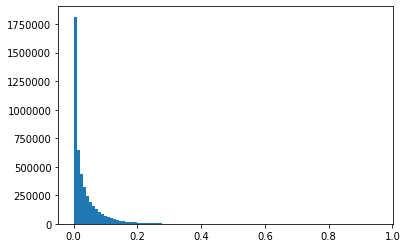

In [64]:
r2vals = []
for j in jobs:
    r2vals.extend(j.r)
plt.hist(r2vals, bins=100)
plt.show()

In [65]:
# get 99.9th percentile
r2thresh = sorted(r2vals)[math.ceil(len(r2vals)*.999)]
r2thresh

0.3606818877742702

In [66]:
# what is 99.99th percentile?
sorted(r2vals)[math.ceil(len(r2vals)*.9999)]

0.5333400789121121

In [67]:
# what is 99th percentile?
sorted(r2vals)[math.ceil(len(r2vals)*.99)]

0.21927319067371567

#### LD prune random loci

In [5]:
lview,dview = get_client()

56 56


In [6]:
reduced.shape

(16664, 41)

In [7]:
def getfreqs(myloci):
    """Get the population ALT frequency as a float (reported as a str in table).
    
    Returns
    -------
    list of tuples
        - first element = locus name
        - second element = pandas.Series
    """
    rets = []
    for locus in myloci:
        rets.append((locus, reduced.loc[locus, [col for col in reduced.columns if '.FREQ' in col]].str.replace("%", "").astype(float) / 100))
    return rets

freqs = dict((locus, freqs) for (locus,freqs) in getfreqs(randomloci))
dview['freqs'] = freqs
len(freqs)

16664

In [8]:
r2thresh

0.3606818877742702

In [15]:
def prune_em(compareto, locusi=None, r2thresh=0.2):
    """If LD between two SNPs is > r2thresh, drop one.
    
    Returns
    -------
    locusi - locus against all others were compaired
    drop - list of SNPs that exceed r2thresh
    """
    from scipy.stats import pearsonr
    
    drop = []
    for locusj in compareto:
        r2 = pearsonr(freqs[locusi], freqs[locusj])[0]**2
        print('r2 = ', r2)
        if r2 > r2thresh:
            drop.append(locusj)

    return locusi,drop

In [18]:
# send the jobs, watch 'em
jobs = []
i = 0
for locusi in tnb(randomloci):
    tosend = randomloci[i+1:]
    jobs.append(lview.apply_async(prune_em, tosend, **{'r2thresh':r2thresh, 'locusi':locusi}))
    i += 1
watch_async(jobs)

16664
16664


In [21]:
# get returns, remove dropped loci from randomloci
keep = list(randomloci)
for j in nb(jobs):
    locusi, drop = j.r
    if locusi in keep:
        for locusj in drop:
            if locusj in keep:
                keep.remove(locusj)
len(keep)

100%|██████████| 16664/16664 [00:07<00:00, 2161.50it/s]


8591

In [27]:
# save it!
baydir = makedir(op.join(mafdir, 'baypass'))
pkldump(keep, op.join(baydir, 'no-missing-data_20-dp-1000_random-snps_1-per-contig-gt100Kbp_r2-lessthan-p36068.pkl'))

In [30]:
ls(baydir)

['no-missing-data_20-dp-1000_random-snps_1-per-contig-gt100Kbp_r2-lessthan-p36068.pkl']

In [4]:
keep = pklload(op.join(mafdir, 'baypass/no-missing-data_20-dp-1000_random-snps_1-per-contig-gt100Kbp_r2-lessthan-p36068.pkl'))

In [5]:
filtered = snps[snps.index.isin(keep)].copy()

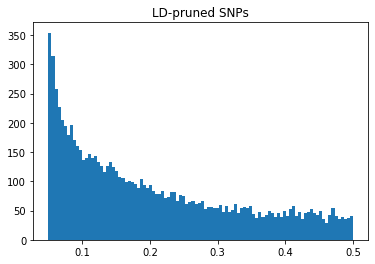

In [10]:
plt.hist(filtered['MAF'], bins=100)
plt.title('LD-pruned SNPs')
plt.show()

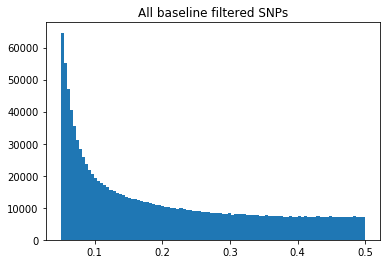

In [11]:
plt.hist(snps['MAF'], bins=100)
plt.title('All baseline filtered SNPs')
plt.show()